# Toquetear el csv

In [ ]:
# Toquetear el csv

In [1]:
# Read contratacion_data.csv
import pandas as pd
df = pd.read_csv("data/contratacion_data.csv")

In [2]:
print(df.describe(include='all'))

                         pdf company amount currency adjudicadora       tipo  \
count                     65      65     65       65           65         65   
unique                    65      42     51        4           43         14   
top     BOE-B-2017-70670.pdf    None   None    euros         None  Servicios   
freq                       1      20     14       48           11         33   

       tramitacion procedimiento  
count           65            65  
unique           3             6  
top      Ordinaria       Abierto  
freq            57            58  


Servicios                        33
Suministros                       7
Servicio                          4
None                              4
Suministro                        4
Contrato de Servicios             3
Contrato de obras                 2
Obras                             2
Administrativo de Servicio        1
Administrativo Especial           1
Contrato de suministro            1
Servicis                          1
Administrativo especial           1
Gestión de servicios públicos     1
Name: tipo, dtype: int64


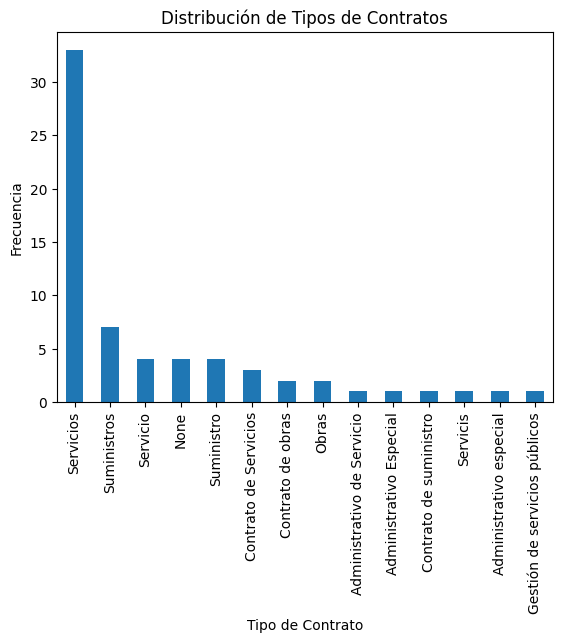

Revisar y limpiar datos de 'amount' para análisis.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Análisis de frecuencia de tipos de contratos
print(df['tipo'].value_counts())

# Visualización de los tipos de contrato
df['tipo'].value_counts().plot(kind='bar')
plt.title('Distribución de Tipos de Contratos')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Frecuencia')
plt.show()

# Análisis de montos de contrato si 'amount' y 'currency' están limpios y convertidos adecuadamente
if df['amount'].dtype == float:
    plt.figure(figsize=(10, 6))
    df['amount'].hist(bins=20)
    plt.title('Distribución de Montos de Contrato')
    plt.xlabel('Monto')
    plt.ylabel('Frecuencia')
    plt.show()
else:
    print("Revisar y limpiar datos de 'amount' para análisis.")


In [4]:
df["amount"].unique()

array(['None', '30000000.0', '1500000.0', '2008806.15', '4417778.64',
       '172546.0', '308730.29', '1355831.81', '1211710.0', '370000.0',
       '174560.65', '483393.79', '565811.04', '4524000.0', '561440.0',
       '520000.0', '122993.55', '175111.2', '2899125.0', '1865578.0',
       '139440.0', '18550000.0', '365420.0', '4718300.0', '2000000.0',
       '1720787363.63', '236250.0', '486840.0', '239423.08', '882644.62',
       '780000.0', '459800.0', '2208890.32', '232320.0', '154674.0',
       '786500.0', '415119.24', '203280.0', '3417375.02', '149720.0',
       '18398840.0', '5027182.89', '451230.96', '647785.75', '2132010.64',
       '181500.0', '143260.0', '1332450.0', '268382.44', '434680.96',
       '779861.46'], dtype=object)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Convertir 'None' a NaN y cambiar el tipo de la columna a float
df['amount'] = df['amount'].replace('None', np.nan).astype(float)

# Verificar los cambios
print(df['amount'].unique())


[           nan 3.00000000e+07 1.50000000e+06 2.00880615e+06
 4.41777864e+06 1.72546000e+05 3.08730290e+05 1.35583181e+06
 1.21171000e+06 3.70000000e+05 1.74560650e+05 4.83393790e+05
 5.65811040e+05 4.52400000e+06 5.61440000e+05 5.20000000e+05
 1.22993550e+05 1.75111200e+05 2.89912500e+06 1.86557800e+06
 1.39440000e+05 1.85500000e+07 3.65420000e+05 4.71830000e+06
 2.00000000e+06 1.72078736e+09 2.36250000e+05 4.86840000e+05
 2.39423080e+05 8.82644620e+05 7.80000000e+05 4.59800000e+05
 2.20889032e+06 2.32320000e+05 1.54674000e+05 7.86500000e+05
 4.15119240e+05 2.03280000e+05 3.41737502e+06 1.49720000e+05
 1.83988400e+07 5.02718289e+06 4.51230960e+05 6.47785750e+05
 2.13201064e+06 1.81500000e+05 1.43260000e+05 1.33245000e+06
 2.68382440e+05 4.34680960e+05 7.79861460e+05]


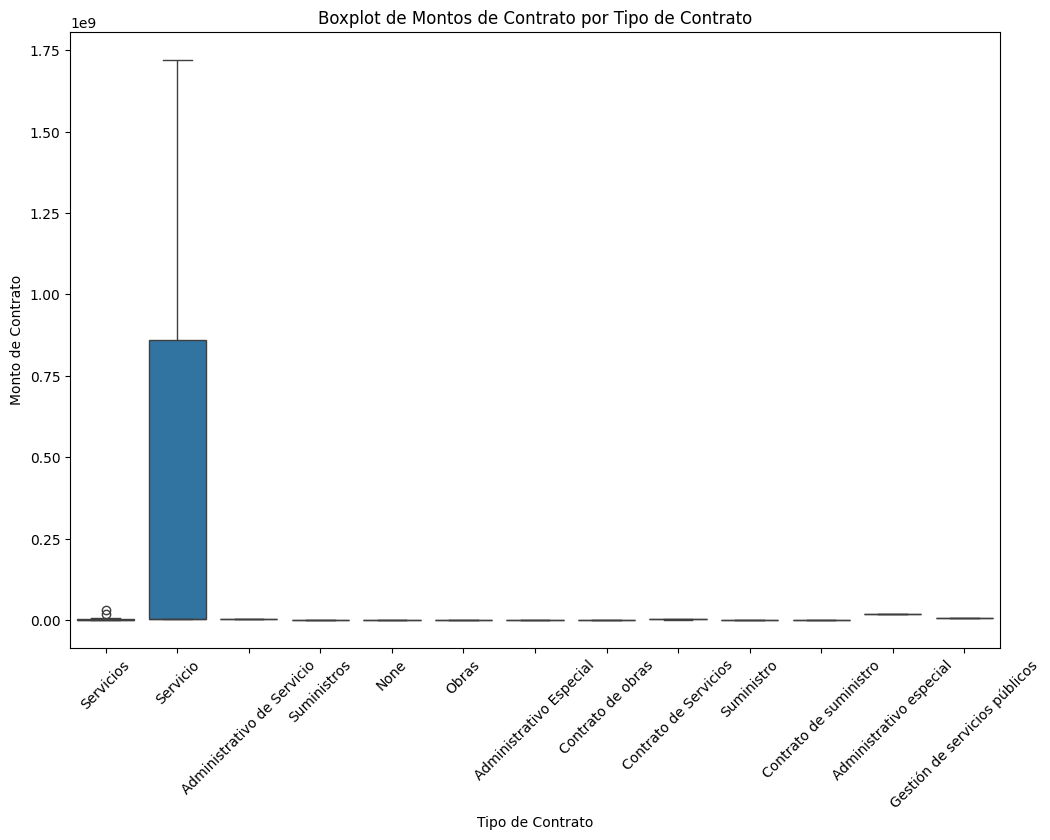

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Eliminar filas con valores NaN en 'amount' para evitar errores en la visualización
df_clean = df.dropna(subset=['amount'])

# Crear el boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='tipo', y='amount', data=df_clean)
plt.title('Boxplot de Montos de Contrato por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Monto de Contrato')
plt.xticks(rotation=45)  # Rota las etiquetas del eje x para mejor visualización
plt.show()

In [7]:
# Establecer un umbral para filtrar valores atípicos extremos
# Aquí usamos el cuantil 0.99 como umbral, eliminando cualquier valor por encima de este
threshold = df['amount'].quantile(0.9)
df_filtered = df[df['amount'] <= threshold]

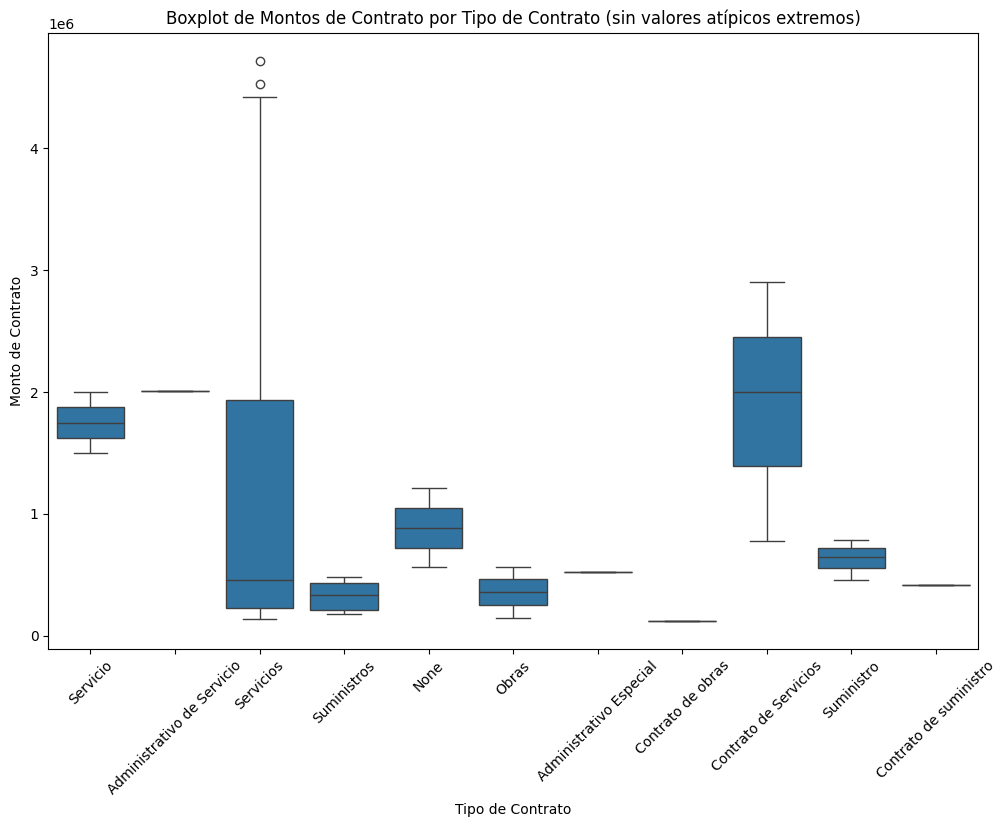

In [8]:
# Crear el boxplot filtrado
plt.figure(figsize=(12, 8))
sns.boxplot(x='tipo', y='amount', data=df_filtered)
plt.title('Boxplot de Montos de Contrato por Tipo de Contrato (sin valores atípicos extremos)')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Monto de Contrato')
plt.xticks(rotation=45)  # Rota las etiquetas del eje x para mejor visualización
plt.show()